<center><h1>Python Pandas Tutorial</h1><center>

## Pandas is Python Data Analysis Library

pandas is an open source, BSD-licensed(can use for commercial means) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

* Widely used
* Open Source
* Active Development
* Great Documentation

Home Page: http://pandas.pydata.org/

Using Documentation from: http://pandas.pydata.org/pandas-docs/stable/

Fantastic Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

Best book by Panda's creator Wes Kinney (2nd Edition 2017): http://shop.oreilly.com/product/0636920050896.do

In [1]:
import pandas as pd

In [2]:
#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

In [3]:
# Pandas is a big package took a while...

In [4]:
import numpy as np # another big library with various numeric functions

In [5]:
import matplotlib.pyplot as plt

# Panda's two fundamental data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.
Simplest Series is from an array of data.

In [6]:
# Let's create some Series!

In [7]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [8]:
s+4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [9]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [10]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [11]:
s2**2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [12]:
### Often you want Series with an index identifying each data point with a label 

In [13]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [14]:
## A  bit similar to dictionary isn't it?


In [15]:
labeledSeries['g']

31

In [16]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [17]:
labeledSeries.values

array([ 24,  77, -35,  31])

In [18]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [19]:
# select values via a boolean array
labeledSeries[labeledSeries > 30]

e    77
g    31
dtype: int64

In [20]:
# So Series behaves like a fixed-length, ordered dictionary with extra helper methods

In [21]:
'd' in labeledSeries

True

### Can create series from dictionary by simply passing to constructor pd.Series(mydict)

In [22]:
citydict = {'Riga': 650000, 'Tukums':20000, 'Ogre': 25000, 'Carnikava': 3000}
citydict

{'Riga': 650000, 'Tukums': 20000, 'Ogre': 25000, 'Carnikava': 3000}

In [23]:
cseries = pd.Series(citydict)
cseries

Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
dtype: int64

In [24]:
## Overwriting default index
clist = ['Jurmala', 'Riga', 'Tukums', 'Ogre', 'Daugavpils']
cseries2 = pd.Series(citydict, index = clist)
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [25]:
# notice Carnikava was lost, since our index did not have it!
# and order was preserved from the given index list!

In [26]:
# For missing data
cseries2.isnull()

Jurmala        True
Riga          False
Tukums        False
Ogre          False
Daugavpils     True
dtype: bool

In [27]:
cseries2.dropna()

Riga      650000.0
Tukums     20000.0
Ogre       25000.0
dtype: float64

In [28]:
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [29]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils          NaN
Jurmala             NaN
Ogre            50000.0
Riga          1300000.0
Tukums          40000.0
dtype: float64

In [30]:
# So NaN + number = NaN

In [31]:
cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
Name: Latvian Cities, dtype: int64

In [32]:
cseries.index

Index(['Riga', 'Tukums', 'Ogre', 'Carnikava'], dtype='object', name='City')

In [33]:
cseries.index = ['CarnikavaIsNotaCity','OgreEatsHumans', 'RigaIsOld', 'TukumsSmukums']
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld               25000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [34]:
# Series values are mutable
cseries['RigaIsOld']=625000
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [35]:
# How to rename individual index elements?
cseries.index[2]='RigaIsOldButFantastic'
cseries

TypeError: Index does not support mutable operations

In [36]:
# We use Renaming method to rename individual elements

In [37]:
cseries.rename(index={'RigaIsOld':'RigaRocks'})

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaRocks              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

### Integer (Position-based) vs Label-based Indexes

Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [38]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [39]:
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. 

Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [40]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [41]:
## With a non-integer index there is no potential for ambiguity:

In [42]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [43]:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [44]:
## To keep things consistent, if you have an axis index containing integers, data selection
##will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integers):

In [45]:
ser2.loc['b']

1.0

In [46]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [47]:
ser.iloc[:1]

0    0.0
dtype: float64

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

Date ranges are used as indexes for time series data:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#time-series

In [48]:
dates = pd.date_range('20180521', periods=15)
dates

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('20200416', periods=15, freq="W")

DatetimeIndex(['2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05',
               '2020-07-12', '2020-07-19', '2020-07-26'],
              dtype='datetime64[ns]', freq='W-SUN')

In [50]:
pd.date_range('20200416', periods=7, freq="W-THU")

DatetimeIndex(['2020-04-16', '2020-04-23', '2020-04-30', '2020-05-07',
               '2020-05-14', '2020-05-21', '2020-05-28'],
              dtype='datetime64[ns]', freq='W-THU')

In [51]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [52]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2021, 4, 22)

In [53]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
months

DatetimeIndex(['2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-03', '2022-02-01'],
              dtype='datetime64[ns]', freq='BMS')

## Reading data files

In [54]:
city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [55]:
type(city_data)

pandas.core.frame.DataFrame

In [56]:
city_series = city_data.squeeze()
type(city_series)

pandas.core.series.Series

In [57]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [58]:
city_series["Salaspils"]

18071

In [59]:
city_series.sum()

2254964

In [60]:
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [61]:
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [62]:
bitmap = city_series < 1000
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Saldus novads        False
Saulkrastu novads    False
Ogre                 False
Ikšķile              False
Līgatne               True
Talsi                False
Varakļāni            False
Ilūkste              False
Babītes novads       False
Auce                 False
Rēzeknes novads      False
Naukšēnu novads      False
Līgatnes novads      False
Durbes novads        False
Skrīveru novads      False
Ape                   True
Grobiņa              False
Viļāni               False
Valkas novads        False
Pāvilostas novads    False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [63]:
city_series[bitmap].sort_index()

Teritoriālā vienība
Ainaži       689
Ape          850
Durbe        503
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Subate       635
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns. 

Each column can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index;

Think of it 
as an ordered dict of Series all sharing the same row index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray) 
rather than a list, dict, or some other collection of
one-dimensional arrays.

In [64]:
# Many ways of Data Frame creation
# One Common way is common is
# from a dict of equal-length lists or NumPy arrays

In [65]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [66]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [67]:
# missing column simply given Nans

In [68]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [69]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [70]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)


In [71]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [72]:
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [73]:
# delete column by its name
del df2["budget"]
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


In [74]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))
# We passed 15 rows of 5 random elements and set index to dates and columns to our basic list elements
df

,A,B,C,D,E
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893


In [75]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [76]:
#most columns need matching length!

Categorical data type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    

In [77]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])

In [78]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [79]:
## different datatypes for columns! 

In [80]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

In [81]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [82]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [83]:
df.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [84]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [85]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [86]:
df3.describe()

,A,C,D
count,7.0,6.000000,7.000000
mean,1.0,1.083333,13.000000
std,0.0,3.352859,13.490738
min,1.0,-5.000000,0.000000
25%,1.0,0.250000,2.500000
50%,1.0,2.000000,9.000000
75%,1.0,3.375000,20.500000
max,1.0,4.000000,36.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       15 non-null     float64
 1   B       15 non-null     float64
 2   C       15 non-null     float64
 3   D       15 non-null     float64
 4   E       15 non-null     float64
dtypes: float64(5)
memory usage: 720.0 bytes


In [88]:
# Transpose

In [89]:
df3.T

,0,1,2,3,4,5,6
A,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00
C,1.0,4.0,3.5,3.0,NaN,0.0,-5.0
D,0,1,4,9,16,25,36
E,test,train,test,train,test,train,train
F,aha,aha,aha,aha,aha,aha,aha


In [90]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893


In [91]:
## Sort by Axis in reverse

In [92]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
2018-05-21,-1.229888,-1.484667,-0.718685,-0.352326,-1.785806
2018-05-22,-0.549664,0.183605,1.645441,-0.248202,0.591306
2018-05-23,0.217854,0.962457,-0.293028,-0.095600,0.878047
2018-05-24,0.010533,-1.577870,-1.650124,-1.021571,-0.766189
2018-05-25,-0.345802,-1.602065,1.373829,-0.245418,-0.202912
2018-05-26,-1.056575,0.976889,-0.829652,0.437279,-0.978630
2018-05-27,-0.305938,0.246168,1.400773,-0.843784,-0.276816
2018-05-28,0.592841,0.521435,-1.611016,-0.169984,0.403081
2018-05-29,0.316275,-2.937055,-0.116457,0.535168,0.338746
2018-05-30,-1.008893,-1.414831,-0.825921,1.360005,0.446788


In [93]:
df3.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [94]:
# Notice NaN gets last

### Selection 

Note: while standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [95]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [96]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [97]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [98]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [99]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For getting a cross section using a label:

In [100]:
df

,A,B,C,D,E
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893


In [101]:
df.loc[dates[0]]

A   -1.785806
B   -0.352326
C   -0.718685
D   -1.484667
E   -1.229888
Name: 2018-05-21 00:00:00, dtype: float64

In [102]:
df.loc[dates[2:5]]

,A,B,C,D,E
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802


In [103]:
## Selecting on a multi-axis by label:

In [104]:
df.loc[:, ['A','B','C']]

,A,B,C
2018-05-21,-1.785806,-0.352326,-0.718685
2018-05-22,0.591306,-0.248202,1.645441
2018-05-23,0.878047,-0.095600,-0.293028
2018-05-24,-0.766189,-1.021571,-1.650124
2018-05-25,-0.202912,-0.245418,1.373829
2018-05-26,-0.978630,0.437279,-0.829652
2018-05-27,-0.276816,-0.843784,1.400773
2018-05-28,0.403081,-0.169984,-1.611016
2018-05-29,0.338746,0.535168,-0.116457
2018-05-30,0.446788,1.360005,-0.825921


In [105]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2018-05-23,0.878047,-0.095600,-0.293028
2018-05-24,-0.766189,-1.021571,-1.650124
2018-05-25,-0.202912,-0.245418,1.373829


In [106]:
df.loc['20180525':'20180601',['B','C']]

,B,C
2018-05-25,-0.245418,1.373829
2018-05-26,0.437279,-0.829652
2018-05-27,-0.843784,1.400773
2018-05-28,-0.169984,-1.611016
2018-05-29,0.535168,-0.116457
2018-05-30,1.360005,-0.825921
2018-05-31,0.659366,0.326476
2018-06-01,-0.503422,0.648527


In [107]:
# Reduction in the dimensions of the returned object:

In [108]:
df.loc['20180526', ["B", "D"]]

B    0.437279
D    0.976889
Name: 2018-05-26 00:00:00, dtype: float64

In [109]:
## Getting scalars (single values)

In [110]:
df.loc['20180526', ["D"]]

D    0.976889
Name: 2018-05-26 00:00:00, dtype: float64

In [111]:
# same as above

In [112]:
df.at[dates[5],'D']

0.9768894232240647

In [113]:
## Selection by Position

In [114]:
df.iloc[3]

A   -0.766189
B   -1.021571
C   -1.650124
D   -1.577870
E    0.010533
Name: 2018-05-24 00:00:00, dtype: float64

In [115]:
# By integer slices, acting similar to numpy/python:

In [116]:
df.iloc[2:5,:2]

,A,B
2018-05-23,0.878047,-0.095600
2018-05-24,-0.766189,-1.021571
2018-05-25,-0.202912,-0.245418


In [117]:
# By lists of integer position locations, similar to the numpy/python style:

In [118]:
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2018-05-24,-1.021571,0.010533,-1.650124
2018-05-26,0.437279,-1.056575,-0.829652
2018-05-22,-0.248202,-0.549664,1.645441


In [119]:
df.iloc[2,2]

-0.29302791537806766

In [120]:
# For getting fast access to a scalar (equivalent to the prior method):

In [121]:
df.iat[2,2]

-0.29302791537806766

## Boolean Indexing

In [122]:
## Using a single column’s values to select data.

In [123]:
df[df.A > 0.2]

,A,B,C,D,E
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893
2018-05-31,0.748381,0.659366,0.326476,0.419611,0.102631
2018-06-04,0.287855,-0.434300,0.366946,-1.143763,-1.365494


In [124]:
df[df > 0]

,A,B,C,D,E
2018-05-21,NaN,NaN,NaN,NaN,NaN
2018-05-22,0.591306,NaN,1.645441,0.183605,NaN
2018-05-23,0.878047,NaN,NaN,0.962457,0.217854
2018-05-24,NaN,NaN,NaN,NaN,0.010533
2018-05-25,NaN,NaN,1.373829,NaN,NaN
2018-05-26,NaN,0.437279,NaN,0.976889,NaN
2018-05-27,NaN,NaN,1.400773,0.246168,NaN
2018-05-28,0.403081,NaN,NaN,0.521435,0.592841
2018-05-29,0.338746,0.535168,NaN,NaN,0.316275
2018-05-30,0.446788,1.360005,NaN,NaN,NaN


In [125]:
df[df > 1]

,A,B,C,D,E
2018-05-21,NaN,NaN,NaN,NaN,NaN
2018-05-22,NaN,NaN,1.645441,NaN,NaN
2018-05-23,NaN,NaN,NaN,NaN,NaN
2018-05-24,NaN,NaN,NaN,NaN,NaN
2018-05-25,NaN,NaN,1.373829,NaN,NaN
2018-05-26,NaN,NaN,NaN,NaN,NaN
2018-05-27,NaN,NaN,1.400773,NaN,NaN
2018-05-28,NaN,NaN,NaN,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,NaN,1.360005,NaN,NaN,NaN


In [126]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20180521', periods=15))
s1

2018-05-21       0
2018-05-22       1
2018-05-23       8
2018-05-24      27
2018-05-25      64
2018-05-26     125
2018-05-27     216
2018-05-28     343
2018-05-29     512
2018-05-30     729
2018-05-31    1000
2018-06-01    1331
2018-06-02    1728
2018-06-03    2197
2018-06-04    2744
Freq: D, dtype: int64

In [127]:
df['F'] = s1
df

,A,B,C,D,E,F
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,0
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664,1
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,8
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,27
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802,64
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,125
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,216
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,343
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,512
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,729


In [128]:
df['F']=42
df

,A,B,C,D,E,F
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664,42
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802,42
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42


In [129]:
df['G']=[x**3 for x in range(15)] # passing a fresh list to particular column
df

,A,B,C,D,E,F,G
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42,0
2018-05-22,0.591306,-0.248202,1.645441,0.183605,-0.549664,42,1
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42,8
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42,27
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802,42,64
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42,125
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42,216
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42,343
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42,512
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42,729


In [130]:
df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F,G
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42,0
2018-05-22,33.000000,-0.248202,1.645441,0.183605,-0.549664,42,1
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42,8
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42,27
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,-0.345802,42,64
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42,125
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42,216
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42,343
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42,512
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42,729


In [131]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F,G
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42,0
2018-05-22,33.000000,-0.248202,1.645441,0.183605,-0.549664,42,1
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42,8
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42,27
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,42.000000,42,64
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42,125
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42,216
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42,343
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42,512
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42,729


In [132]:
df3 = df.copy()
df3

,A,B,C,D,E,F,G
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42,0
2018-05-22,33.000000,-0.248202,1.645441,0.183605,-0.549664,42,1
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42,8
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42,27
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,42.000000,42,64
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42,125
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42,216
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42,343
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42,512
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42,729


In [133]:
df3[df3 > 0.2 ] = -df3
df3

,A,B,C,D,E,F,G
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,-42,0
2018-05-22,-33.000000,-0.248202,-1.645441,0.183605,-0.549664,-42,-1
2018-05-23,-0.878047,-0.095600,-0.293028,-0.962457,-0.217854,-42,-8
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,-42,-27
2018-05-25,-0.202912,-0.245418,-1.373829,-1.602065,-42.000000,-42,-64
2018-05-26,-0.978630,-0.437279,-0.829652,-0.976889,-1.056575,-42,-125
2018-05-27,-0.276816,-0.843784,-1.400773,-0.246168,-0.305938,-42,-216
2018-05-28,-0.403081,-0.169984,-1.611016,-0.521435,-0.592841,-42,-343
2018-05-29,-0.338746,-0.535168,-0.116457,-2.937055,-0.316275,-42,-512
2018-05-30,-0.446788,-1.360005,-0.825921,-1.414831,-1.008893,-42,-729


In [134]:
# Missing Data
# pandas primarily uses the value np.nan to represent missing data. 
# It is by default not included in computations.

In [135]:
df['H'] = np.nan
df

,A,B,C,D,E,F,G,H
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42,0,NaN
2018-05-22,33.000000,-0.248202,1.645441,0.183605,-0.549664,42,1,NaN
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42,8,NaN
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42,27,NaN
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,42.000000,42,64,NaN
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42,125,NaN
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42,216,NaN
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42,343,NaN
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42,512,NaN
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42,729,NaN


In [136]:
df.fillna(value=3.14)

,A,B,C,D,E,F,G,H
2018-05-21,-1.785806,-0.352326,-0.718685,-1.484667,-1.229888,42,0,3.14
2018-05-22,33.000000,-0.248202,1.645441,0.183605,-0.549664,42,1,3.14
2018-05-23,0.878047,-0.095600,-0.293028,0.962457,0.217854,42,8,3.14
2018-05-24,-0.766189,-1.021571,-1.650124,-1.577870,0.010533,42,27,3.14
2018-05-25,-0.202912,-0.245418,1.373829,-1.602065,42.000000,42,64,3.14
2018-05-26,-0.978630,0.437279,-0.829652,0.976889,-1.056575,42,125,3.14
2018-05-27,-0.276816,-0.843784,1.400773,0.246168,-0.305938,42,216,3.14
2018-05-28,0.403081,-0.169984,-1.611016,0.521435,0.592841,42,343,3.14
2018-05-29,0.338746,0.535168,-0.116457,-2.937055,0.316275,42,512,3.14
2018-05-30,0.446788,1.360005,-0.825921,-1.414831,-1.008893,42,729,3.14


In [137]:
# there is also df.dropna() to drop any ROWS! with missing data

## Operations

DataFrame methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [138]:
df.mean()

A      1.990380
B     -0.147631
C     -0.003184
D     -0.502944
E      2.421292
F     42.000000
G    735.000000
H           NaN
dtype: float64

In [139]:
df.max()

A      33.000000
B       1.360005
C       1.645441
D       0.976889
E      42.000000
F      42.000000
G    2744.000000
H            NaN
dtype: float64

In [140]:
# Other axis

In [141]:
df.mean(axis=1)

2018-05-21      5.204090
2018-05-22     11.004454
2018-05-23      7.381390
2018-05-24      9.142111
2018-05-25     21.046205
2018-05-26     23.649902
2018-05-27     36.888629
2018-05-28     54.962337
2018-05-29     78.876668
2018-05-30    109.936735
2018-05-31    149.179495
2018-06-01    196.114292
2018-06-02    252.007244
2018-06-03    319.986083
2018-06-04    397.673035
Freq: D, dtype: float64

In [142]:
## String operations (df.str.*)

In [143]:
str1 = pd.Series(['APPle', 'baNAna', np.NaN, 42, 'mangO'])
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [144]:
help(str1.str)

Help on StringMethods in module pandas.core.strings.accessor object:

class StringMethods(pandas.core.base.NoNewAttributesMixin)
 |  StringMethods(data)
 |  
 |  Vectorized string functions for Series and Index.
 |  
 |  NAs stay NA unless handled otherwise by a particular method.
 |  Patterned after Python's string methods, with some inspiration from
 |  R's stringr package.
 |  
 |  Examples
 |  --------
 |  >>> s = pd.Series(["A_Str_Series"])
 |  >>> s
 |  0    A_Str_Series
 |  dtype: object
 |  
 |  >>> s.str.split("_")
 |  0    [A, Str, Series]
 |  dtype: object
 |  
 |  >>> s.str.replace("_", "")
 |  0    AStrSeries
 |  dtype: object
 |  
 |  Method resolution order:
 |      StringMethods
 |      pandas.core.base.NoNewAttributesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, data)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  capitalize(self)
 |      Conv

In [145]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [146]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

In [147]:
## Apply

In [148]:
df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E,F,G,H
2018-05-21,-5.357417,-1.056979,-2.156054,-4.454001,-3.689664,126,0,NaN
2018-05-22,99.000000,-0.744605,4.936324,0.550814,-1.648991,126,3,NaN
2018-05-23,2.634140,-0.286799,-0.879084,2.887372,0.653562,126,24,NaN
2018-05-24,-2.298568,-3.064714,-4.950372,-4.733610,0.031600,126,81,NaN
2018-05-25,-0.608737,-0.736255,4.121488,-4.806194,126.000000,126,192,NaN
2018-05-26,-2.935889,1.311837,-2.488956,2.930668,-3.169725,126,375,NaN
2018-05-27,-0.830448,-2.531351,4.202318,0.738505,-0.917815,126,648,NaN
2018-05-28,1.209242,-0.509953,-4.833048,1.564304,1.778524,126,1029,NaN
2018-05-29,1.016237,1.605504,-0.349370,-8.811165,0.948826,126,1536,NaN
2018-05-30,1.340363,4.080014,-2.477762,-4.244492,-3.026679,126,2187,NaN


In [149]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [150]:
df.groupby('key')

In [151]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### Time series

In [152]:
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [153]:
ts = ts.cumsum() # cumulative sum

<AxesSubplot:>

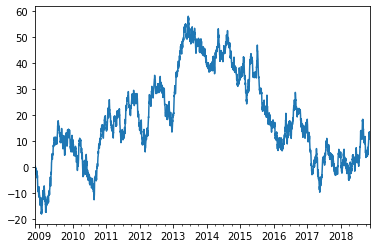

In [154]:
ts.plot()

In [155]:
ts["2014-01-01":"2016-01-01"] = np.NaN

<AxesSubplot:>

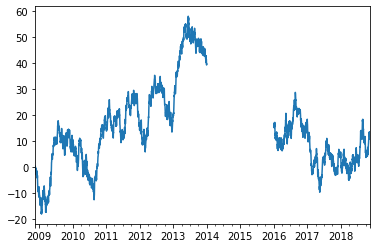

In [156]:
ts.plot()

In [157]:
rolling_avg = ts.rolling(window=90).mean()
rolling_avg

2008-11-18         NaN
2008-11-19         NaN
2008-11-20         NaN
2008-11-21         NaN
2008-11-22         NaN
                ...   
2018-11-11    9.911254
2018-11-12    9.919107
2018-11-13    9.927527
2018-11-14    9.918967
2018-11-15    9.893233
Freq: D, Length: 3650, dtype: float64

<AxesSubplot:>

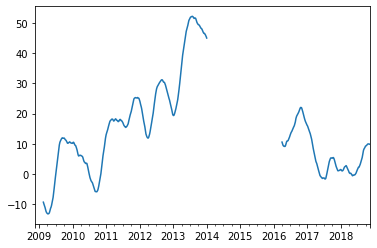

In [158]:
rolling_avg.plot()

## File operations

In [159]:
# CSV
# Writing to a csv file.

In [160]:
df.to_csv("testing.csv")

In [161]:
# Reading from csv


In [162]:
new_df = pd.read_csv("testing.csv", index_col=0)
new_df.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


In [163]:
# Excel

In [165]:
# this will raise an error if 'openpyxl' package is not installed
df.to_excel('myx.xlsx', sheet_name='Sheet1')


ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
df6=pd.read_excel('myx.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [ ]:
df6.head()

In [ ]:
# basic DataFrame information:

In [ ]:
df.info()

In [ ]:
df.info(memory_usage="deep") # more reliable info